# i) Intro

<font face="Roboto Condensed" size=6 color='#FFCDC9'> <center> Welcome to the
2026 March DA/DS (ML) Workshop! <font/>

<!-- <div>
<font face="Agency FB" size = 5> Settings -> Personalisation -> Font (note that some you need to install packages) <font/>
<div> -->




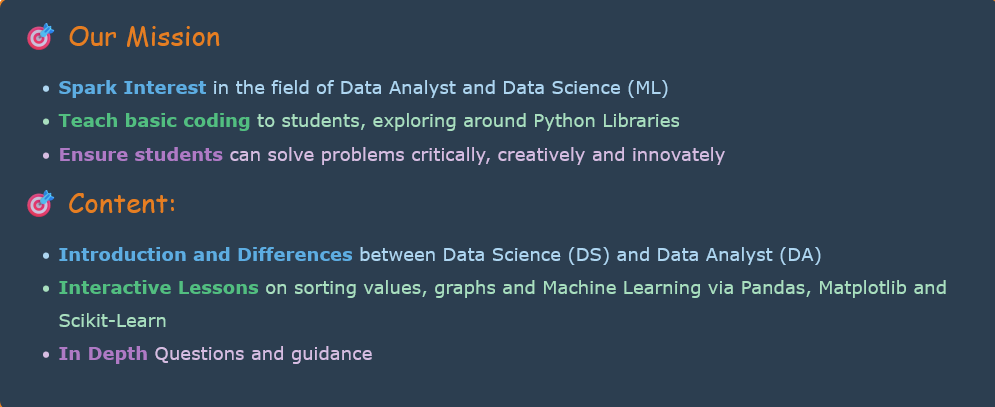

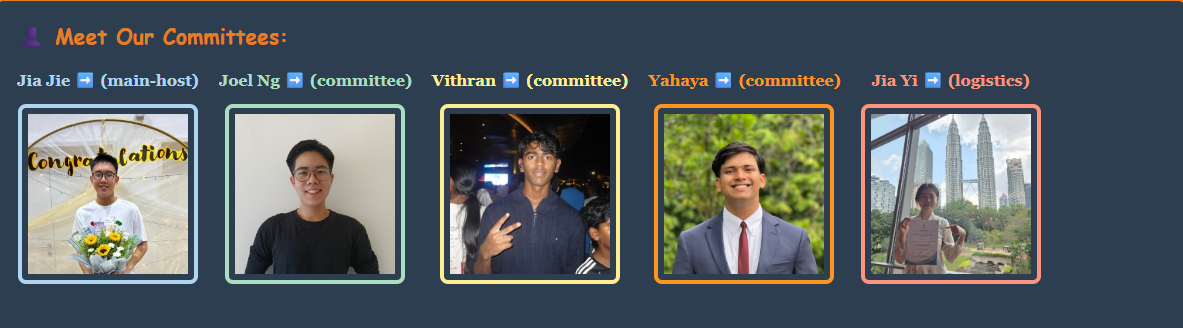

# ii) DS and DA (Similarities vs Differences)

<!-- Ad-Hoc Analysis = One time analysis -->


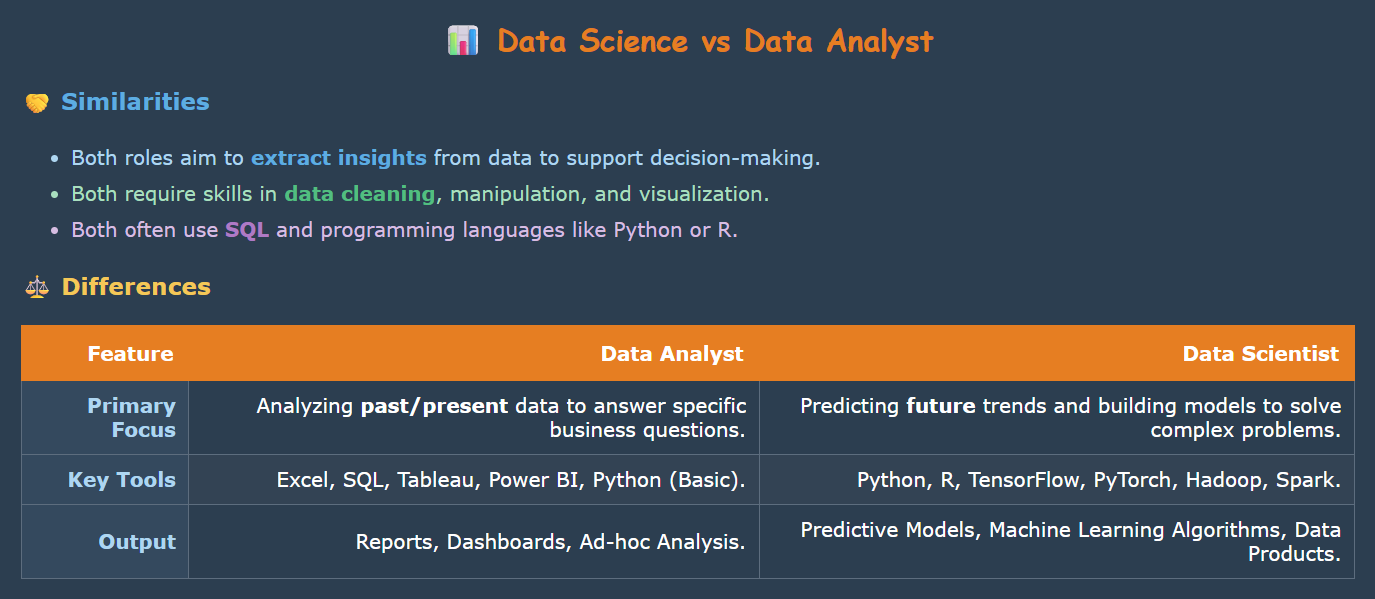

# iii) Learning the interface of GitHub, Google Colab (15 min)

*   [The Tutorial (Click Me)](https://docs.google.com/presentation/d/1sRXOIkZkHFfX4V244n4HkGoQ8MpolMpPjgApt7_o-Bg/edit?usp=sharing)

Optional if fail to upload, then upload files from Google Drive
```
from google.colab import drive
drive.mount('/content/drive')
```




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# A: Pandas

### What is Pandas?

Pandas is a Python library used for working with data sets.
It has functions for analyzing, cleaning, exploring, and manipulating data.



### Adding Library to start (Pt 1)

```
import pandas as pd (this is to handle data)
import numpy as np (this is to handle arrays)
```



In [ ]:
# is comments
#1. We can start by importing our data.u
# from a website:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipotle = pd.read_csv(url, sep = '\t')

# fead is showing first rows, tail is showing last rows
# Example:
chipotle.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
#2. Checking out the dataset
# Example:
short_c = chipotle
a = short_c.info()
# Finding out summary of the DataFrame's structure and memory usage
b = short_c.describe()
# Generates descriptive statistics of the DataFrame's numerical columns by default
c = short_c.index
# Represents the row labels.
d = short_c.columns
# Show columns
e = short_c.dtypes
# Show types of data

# Example:
print(d)

In [ ]:
#3. Locating specific data
print(short_c.values[40][2])
# printing rows, columns
# printed row 39, because index from 0, same goes to column)
print("----------------")
# printing (index rows specifically)
print(short_c.loc[1])

In [ ]:
#4. Time to find out most purchased item in choice_description index

d = chipotle.groupby('choice_description').sum()
# group together and sum it up
d = d.sort_values('quantity', ascending = False)
# ascending order
d[['quantity']].head(1)


In [ ]:
#5. Finding mode

chipotle['item_name'].mode()
# proof:
# chipotle['item_name'].value_counts().head(1)

# Finding Max value
chipotle['quantity'].max()

# Printing Mean value
round(chipotle['quantity'].mean(),2)
# rounding to 2 dp.

# Printing Unique data
chipotle.item_name.nunique()

In [ ]:
#6. Is time to find revenue of sales, in order to do that, we must convert price to int
# This is a function:
dollarizer = lambda x: float(x[1:-1])
chipotle.item_price = chipotle.item_price.apply(dollarizer)

In [ ]:
#7. Now we print
print(chipotle[['item_price']].head(1))

In [ ]:
#8. Printing Revenue
revenue = (chipotle['item_price']*chipotle['quantity']).sum()
print('The revenue is'+ ' ' + '$' + str(np.round(revenue)))

In [ ]:
#9. Average revenue per order
order_count = chipotle.order_id.value_counts().count()
average1 = revenue / order_count
print(average1)

In [ ]:
#10. Total Amount exceeding 10
chipotle['Actual_Amount'] = chipotle['item_price'] / chipotle['quantity']
filtered_chipotle=chipotle.drop_duplicates(['item_name','choice_description'])
filtered_chipo = filtered_chipotle.loc[filtered_chipotle["Actual_Amount"]>10.0]
print(filtered_chipo.shape[0])

In [ ]:
#11. Using original dataset
# Filter by column
chipotle.sort_values(by = "item_name")

In [ ]:
# 12.
# Condition: Number of times an observation rrdered more than one Canned Soda
chipotle[(chipotle["item_name"]=="Canned Soda") & (chipotle["quantity"]>1)].shape[0]

In [ ]:
# 13. Checking duplicates:
num_duplicates = chipotle.duplicated().sum()
print(num_duplicates)

# 14. Since duplicates > 0, drop them
drop = chipotle.drop_duplicates()

59


Concat and Merge

In [ ]:
# 15. Instead of importing the data from CSV files, we now have the following:
import pandas as pd
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [ ]:
# 16. Let's try to join the two dataframes along rows and assign all_data

In [ ]:
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
#17. Join the two dataframes along columns and assing to all_data_col

In [ ]:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [ ]:
# 18. Let's try to Merge all_data and data3 along the subject_id value

In [ ]:
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,5,Ayoung,Atiches,16
5,4,Billy,Bonder,61
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [ ]:
#19. Merge only the data that has the same 'subject_id' on both data1 and data2

In [ ]:
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


## Practice Questions (Pandas)

```
# import this csv file from github
> data.csv
> police.csv
```



From: data.csv

**Q1** Find the names, counts and datatypes of each attribute. Then, display the number of missing values per column.

**Q2** Determine the number of invalid values. (Hint: Think of possible issues regarding `Pulse` and `Maxpulse`)

**Q3** Drop all rows with missing values and/or invalid values. Drop rows with illogical/irrational values as well if you are able to find them. Ensure that formatting is consistent for the `Date` column.

**Q4** Display the mean pulse rate and mean duration of workouts. Format the values to 2 decimal places.

**Q5** Create a new attribute called `Intensity`, where workouts can be categorised as "Low" if `Pulse` <= 100, "High" if `Pulse` >= 120 and "Medium" if otherwise. Display the counts of each category.

From: police.csv

**Q1** Find the names, counts and datatypes of each attribute. Then, display the number of missing values per column.

**Q2** Remove columns where more than half of the values are missing. Display the counts of each type of `violation` committed.

**Q3** Remove all rows/records with missing values. Display the counts of each type of `violation` committed, grouped by `driver_gender`.

**Q4** Create a new attribute called `age_category` with the following categories:

- Underage: 0.0 <= `driver_age` < 18.0
- Young Adult: 18.0 <= `driver_age` < 35.0
- Middle-Aged: 35.0 <= `driver_age` < 65.0
- Senior Citizen: 65.0 <= `driver_age`

Display the number of underaged drivers who were speeding.

**Q5** Find the median driver age for male drivers and for female drivers.

**Q6** Create a new column named `is_speeding` with a Boolean datatype that is True if `violation` == "Speeding" and False if otherwise.

**Q7** Convert `stop_date` to the datetime format. Display the year with the largest amount of speeding violations. ("Speeding" in `violation`)

**Q8** CHALLENGE: Create a new table named `freq` with the columns `driver_gender`, `violation`, `count` and `violation_rank`, where `violation_rank` is the rank of the frequency of violations within each gender.

# B: It's time to plot graphs!

## Import Library
```
import matplotlib.pyplot as plt
import numpy as np
```



### Part 1. Linear Graph

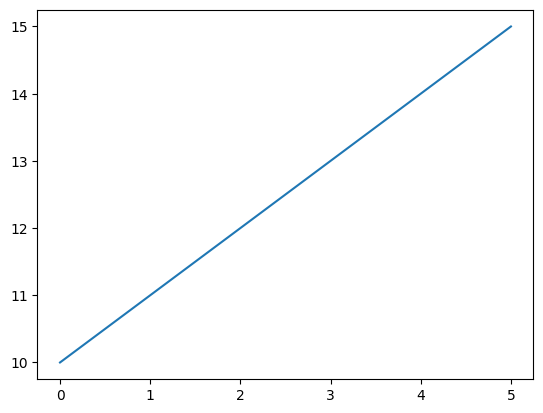

In [ ]:
# 1. Linear Graph (explain by parts)
import matplotlib.pyplot as plt
import numpy as np

k = np.array([0,1,2,3,4,5])

def my_function(x):
  return x+10

plt.plot(k,my_function(k))
plt.show()

# Comments:
# We can improve this by:
# 1. Adding a title
# 2. Adding x-axis, y-axis
# 3. I want to see zero x and zero y.

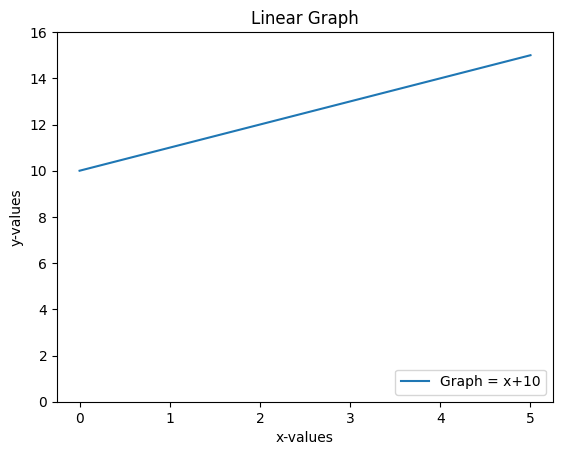

In [ ]:
# Part 2. We improve the linear graph through the comments:
import matplotlib.pyplot as plt
import numpy as np

k = np.array([0,1,2,3,4,5])

def my_function(x):
  return x+10

plt.ylim(0,16)
# easy way to show 0,16; instead of plt.axhline(0) -> just drawing a line at y = 0
plt.plot(k,my_function(k), label = "Graph = x+10")
plt.title("Linear Graph")
plt.legend(loc = 'lower right')
# Optional just for UI
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.show()

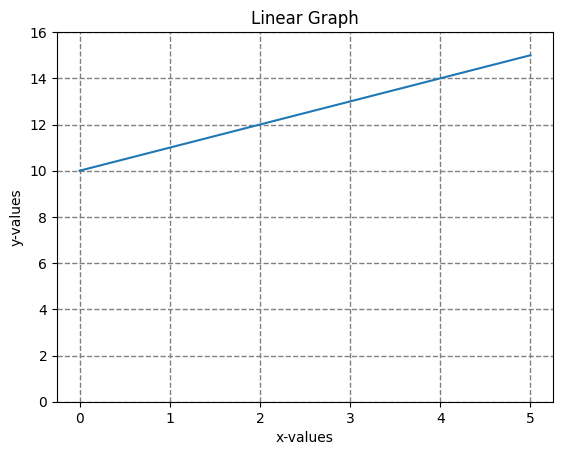

In [ ]:
# So Now everything looks good, but I want to include grid in the answer, looks nicer.
# Part 3. We improve the linear graph through the comments:
import matplotlib.pyplot as plt
import numpy as np

k = np.array([0,1,2,3,4,5])

def my_function(x):
  return x+10

plt.ylim(0,16)
# easy way to show 0,16; instead of plt.axhline(0) -> just drawing a line at y = 0
plt.plot(k,my_function(k))

# Designing the UI
plt.title("Linear Graph")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.grid(True, color = 'grey', linewidth = 1, linestyle = "--")
plt.show()


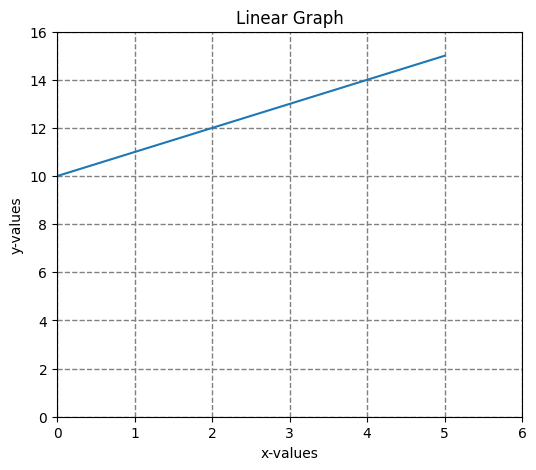

In [ ]:
# Part 4: We also actually can change the k there, we use linespace instead. It's a good common practice because we can use it to plot smooth curves later.
import matplotlib.pyplot as plt
import numpy as np
# We use numpy library to help us.

k = np.linspace(0,5,10)
# linespace(starting point, end point, number of "plots" you are plotting)

def my_function(x):
  return x+10

plt.figure(figsize = (6,5))
# Change size
# figsize = height, width
# if you use plt.figure(num = v1, dpi = v2), do not put dpi too much
plt.xlim(0,6)
plt.ylim(0,16)
# easy way to show 0,16; instead of plt.axhline(0) -> just drawing a line at y = 0
plt.plot(k,my_function(k))

# Designing the UI
plt.title("Linear Graph")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.grid(True, color = 'grey', linewidth = 1, linestyle = "--")
plt.show()


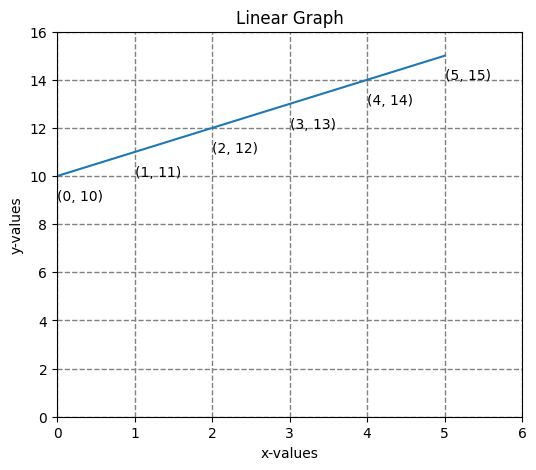

In [ ]:
# Part 5: Let's label:
# I want to label one of the points.
# We can use plt.annotate -> this is a function so need to explain

import matplotlib.pyplot as plt
import numpy as np
# We use numpy library to help us.

k = np.linspace(0,5,10)

def my_function(x):
  return x+10

plt.figure(figsize = (6,5))
plt.ylim(0,16)
plt.xlim(0,6)
# easy way to show 0,16; instead of plt.axhline(0) -> just drawing a line at y = 0
plt.plot(k,my_function(k))

# Designing the UI
plt.title("Linear Graph")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.grid(True, color = 'grey', linewidth = 1, linestyle = "--")

for i in range(6):
  plt.annotate(
      f"{i,my_function(i)}", xy = (i,my_function(i)-1)
  )
plt.show()


Text(0, 0.5, 'Y-axis')

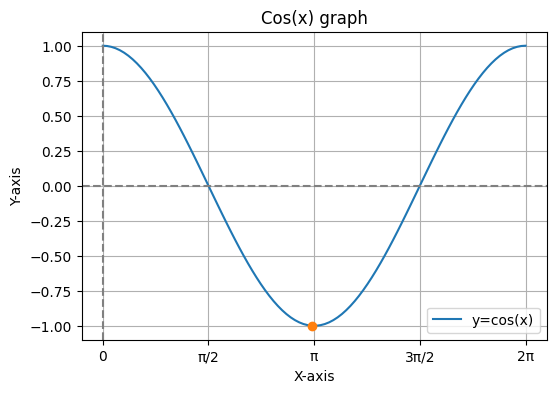

In [ ]:
# Part 6 (Additional). Subplots, fig and ax.
# We use this to easily customize the graph.
# We use another example, with cos(x) graph
# Note we need to change the x-values

import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(0,np.pi*2,100)
def my_function(x):
  return np.cos(x)

y_values = my_function(x_values)

# Instead of this: plt.plot(x_values,y_values)
# We can use:

fig, ax = plt.subplots(figsize = (6,4))
# fig is size
# ax is the logic
ax.plot(x_values,y_values, label = "y=cos(x)")

# Min
min_idx = np.argmin(y_values)
# Note: not np.argmin(x_values because it will return x = 0, only great for example y or x intercept)
x_min = x_values[min_idx]
y_min = y_values[min_idx]

ax.plot(x_min,y_min, marker = 'o')

# UI
ax.set_xticks([0,np.pi/2,np.pi,np.pi*3/2,np.pi*2], ['0', 'π/2','π', '3π/2','2π'])
# ax.set_xticks(array, label)
ax.legend()
plt.axhline(0, color = 'grey', linestyle = "--")
plt.axvline(0, color = 'grey', linestyle = "--")
ax.set_title("Cos(x) graph")
ax.set_xlabel("X-axis")
ax.grid(True)
ax.set_ylabel("Y-axis")

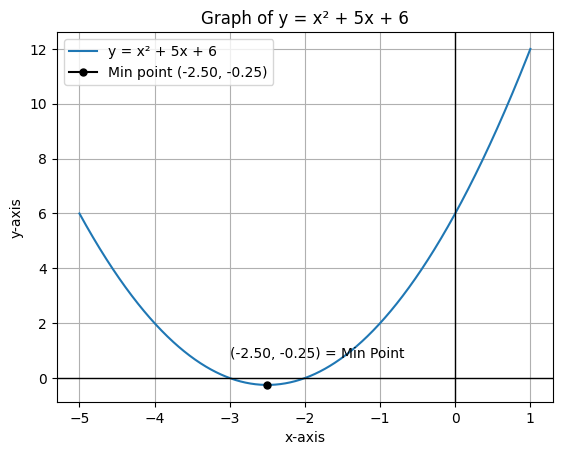

In [ ]:
# Example 2
# Without sub plots.

import matplotlib.pyplot as plt
import numpy as np

# 1. Define the function
def my_function(x):
    return x**2 + 5*x + 6  # Use ** for exponentiation, not ^

# 2. Generate x-values
x_values = np.linspace(-5, 1, 1000)

# 3. Calculate y-values
y_values = my_function(x_values)

# 4. Find the minimum point
min_idx = np.argmin(y_values)
x_min = x_values[min_idx]
y_min = y_values[min_idx]

# 5. Plot the function
plt.figure(num = 0, dpi = 100)
plt.plot(x_values, y_values, linestyle='-', label='y = x² + 5x + 6')

# Mark the minimum point
plt.plot(x_min, y_min, color = 'black', marker = 'o', markersize=5, label=f'Min point ({x_min:.2f}, {y_min:.2f})')
# markersize is changing the size of 'o'

# 6. Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Graph of y = x² + 5x + 6')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
plt.axvline(x=0, color='k', linestyle='-', linewidth=1)

plt.text(x_min-0.5, y_min+1, f'({x_min:.2f}, {y_min:.2f}) = Min Point', fontsize=10)
# another alternative to annotate
# 7. Display the plot
plt.show()

### Part 2. Import Data to Produce Graph (explain by parts)

```
We import NY-House Dataset csv from github!
Also import the necessary libraries!

NYHouseData = pd.read_csv(path-link)
NYHouseData
```



In [ ]:
NYHouseData = pd.read_csv("/NY-House-Dataset.csv")
NYHouseData

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [ ]:
# Now, it looks really messy so it's time to filter and just plot necessary values.
# Let's say we focus on y and x axis of:

# Price against property-sqft
# Price against latitude
# Price against longitude.

# So We need to clean the table.


NY_filter_data = NYHouseData[['PRICE','LATITUDE','LONGITUDE','PROPERTYSQFT']]
NY_filter_data

,PRICE,LATITUDE,LONGITUDE,PROPERTYSQFT
0,315000,40.761255,-73.974483,1400.000000
1,195000000,40.766393,-73.980991,17545.000000
2,260000,40.541805,-74.196109,2015.000000
3,69000,40.761398,-73.974613,445.000000
4,55000000,40.767224,-73.969856,14175.000000
...,...,...,...,...
4796,599000,40.774350,-73.955879,2184.207862
4797,245000,40.732538,-73.860152,2184.207862
4798,1275000,40.745882,-74.003398,2184.207862
4799,598125,40.742770,-73.872752,655.000000


In [ ]:
# We check any empty or duplicate values so we can remove them out.
NY_clean_data = NY_filter_data.drop_duplicates()
NY_clean_data2 = NY_clean_data.dropna()
NY_clean_data2.shape[0]

4582

In [ ]:
# We also need to check whether the numbers are in string or in integer
NY_clean_data2.info()
# We can see that everything is in int(64), and float(64)

<class 'pandas.core.frame.DataFrame'>
Index: 4582 entries, 0 to 4800
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRICE         4582 non-null   int64  
 1   LATITUDE      4582 non-null   float64
 2   LONGITUDE     4582 non-null   float64
 3   PROPERTYSQFT  4582 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 179.0 KB


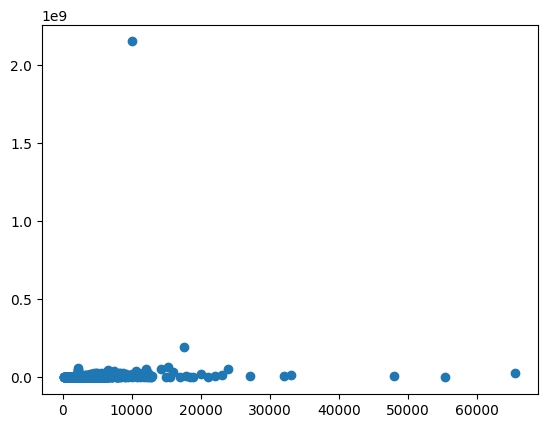

In [ ]:
# Start plotting.

import matplotlib.pyplot as plt
import numpy as np
x_values = np.array(NY_clean_data2['PROPERTYSQFT'])
y_values = np.array(NY_clean_data2['PRICE'])

plt.scatter(x_values,y_values)

# We see that the average property SQFT is approximately around 5000, and it's difficult to check price.
# We can filter out the values.

# Choice 1:
# Filter data in the dataset with pandas

# Choice 2:
# Filter data with matplotlib

Text(0.5, 0, 'ln(Property SQFT)')

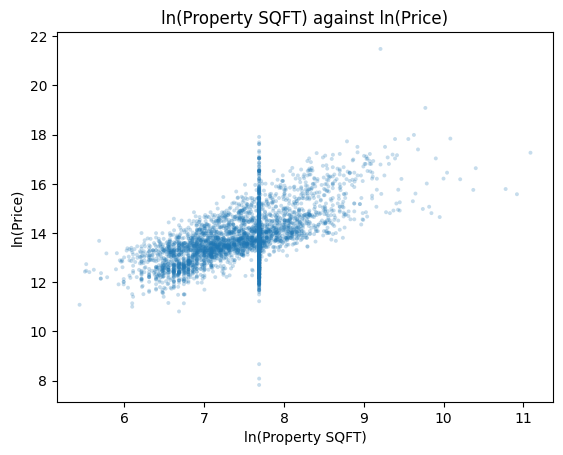

In [ ]:
# I go for Choice 2.
# I am going to label the titles.
plt.scatter(np.log(x_values),np.log(y_values),s=8, alpha=0.25, edgecolors='none')
# log is ln
# log10 is logbase10


# UI
plt.title("ln(Property SQFT) against ln(Price)")
plt.ylabel("ln(Price)")
plt.xlabel("ln(Property SQFT)")


# We can identify that  has a positive correlation.

Text(0.5, 0, 'ln(Property SQFT)')

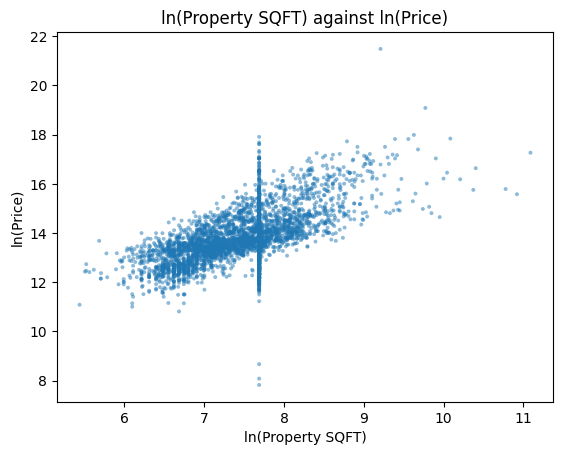

In [ ]:
# Although we see that it is a positive correlation, we can try to visualize the graph better
plt.scatter(np.log(x_values),np.log(y_values),s=8, alpha=0.5, edgecolors='none')
# alpha is transparency
# s is size
# edgecolors is the edge color for each plot


# UI
plt.title("ln(Property SQFT) against ln(Price)")
plt.ylabel("ln(Price)")
plt.xlabel("ln(Property SQFT)")


# We can identify that it has a positive correlation.

Conclusion:
1. We can tell that the graph exhibits a positive correlation.
2. It is either a y = mx graph or a y = mx + c graph (remember it's a ln), so it's okay
3. The vertical at ~7.8 means that a lot of houses have similar sqrt property but have different prices, meaning that either the lat, log affects the price, or data error.

Text(0.5, 0, 'Latitude')

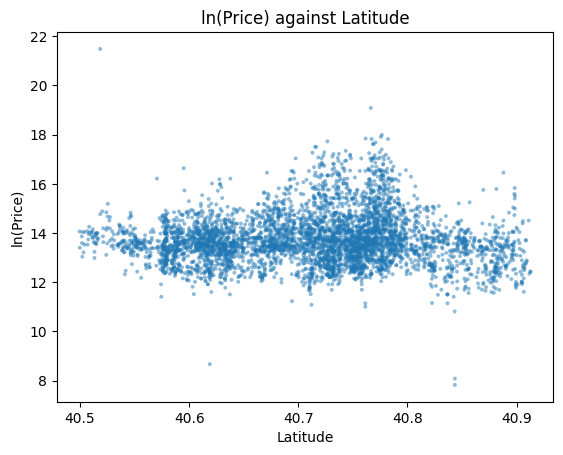

In [ ]:
# We can verify 3, by showing price positively correlates with either latitude or longitude.
# Although we see that it is a positive correlation, we can try to visualize the graph better

x_values = np.array(NY_clean_data2['LATITUDE'])
y_values = np.array(NY_clean_data2['PRICE'])

plt.scatter(x_values,np.log(y_values),s=8, alpha=0.5, edgecolors='none')
# alpha is transparency
# s is size
# edgecolors is the edge color for each plot

# UI
plt.title("ln(Price) against Latitude")
plt.ylabel("ln(Price)")
plt.xlabel("Latitude")

# We can identify that it has a zero, weak positive correlation.

Text(0.5, 0, 'LONGITUDE')

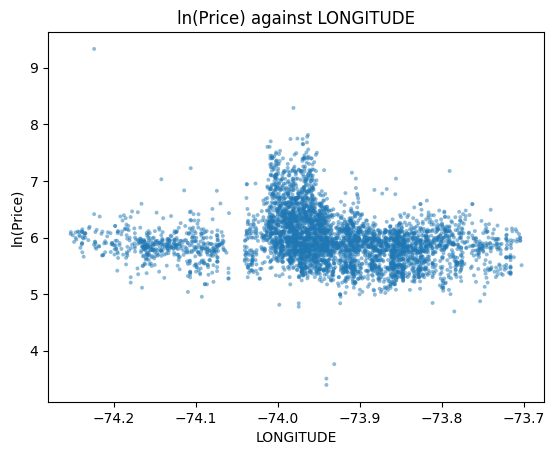

In [ ]:
# Check y-latitude.

x_values = np.array(NY_clean_data2['LONGITUDE'])
y_values = np.array(NY_clean_data2['PRICE'])

plt.scatter(x_values,np.log(y_values),s=8, alpha=0.5, edgecolors='none')
# alpha is transparency
# s is size
# edgecolors is the edge color for each plot

# UI
plt.title("ln(Price) against LONGITUDE")
plt.ylabel("ln(Price)")
plt.xlabel("LONGITUDE")

# We can identify that it has a zero, weak positive correlation.

Conclusion:
It’s mostly other factors + loss of data/info (discretization) that affects that 7.8 spike

### Part 3. Bar Graph(explain by parts)

In [ ]:
# In the pyplot library, there is lots of graph we can try to plot and check.
# Let's try out some graphs.

<BarContainer object of 5 artists>

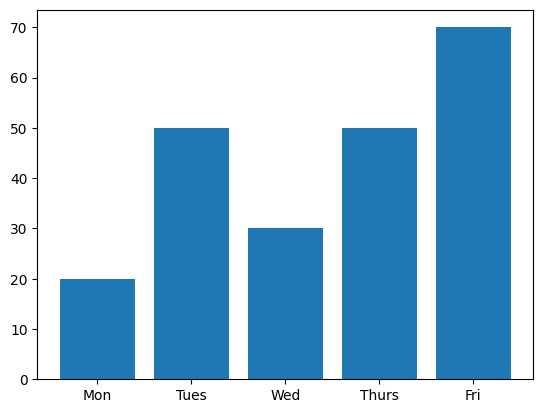

In [ ]:
# Part 1:
import matplotlib.pyplot as plt
import numpy as np

v = np.array([20,50,30,50,70])
subject = np.array(["Mon","Tues","Wed","Thurs","Fri"])

plt.bar(subject,v)


Text(0, 0.5, 'Weekday')

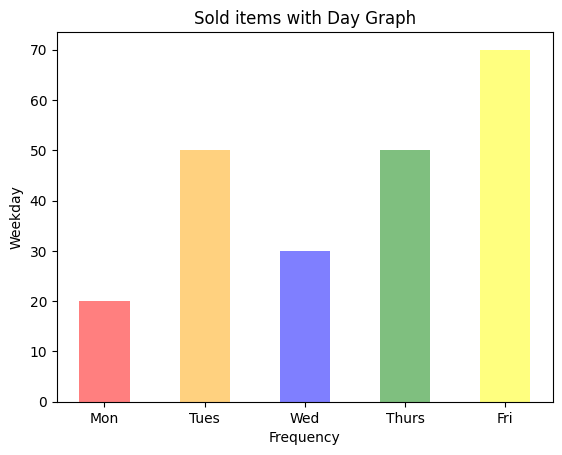

In [ ]:
# 2. We can edit the graph to look nicer:
# Changing the UI

import matplotlib.pyplot as plt
import numpy as np

v = np.array([20,50,30,50,70])
subject = np.array(["Mon","Tues","Wed","Thurs","Fri"])
c = np.array(['red','orange','blue','green','yellow'])

plt.bar(subject,v,color = c, alpha = 0.5, width = 0.5)
plt.title("Sold items with Day Graph")
plt.xlabel("Frequency")
plt.ylabel("Weekday")

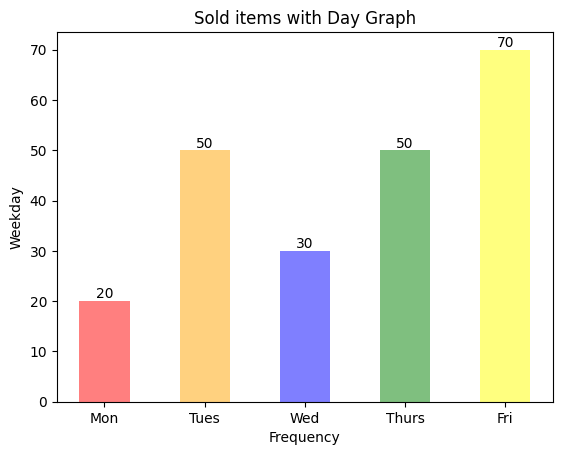

In [ ]:
# Input text:
# 3. We can edit the graph to look nicer:
# Changing the UI

import matplotlib.pyplot as plt
import numpy as np

v = np.array([20,50,30,50,70])
subject = np.array(["Mon","Tues","Wed","Thurs","Fri"])
c = np.array(['red','orange','blue','green','yellow'])

plt.bar(subject,v,color = c, alpha = 0.5, width = 0.5)
plt.title("Sold items with Day Graph")
plt.xlabel("Frequency")
plt.ylabel("Weekday")

for i, val in enumerate(v):
    plt.annotate(
        text=str(val),
        xy= (i,val),
        ha='center',
        va='bottom')

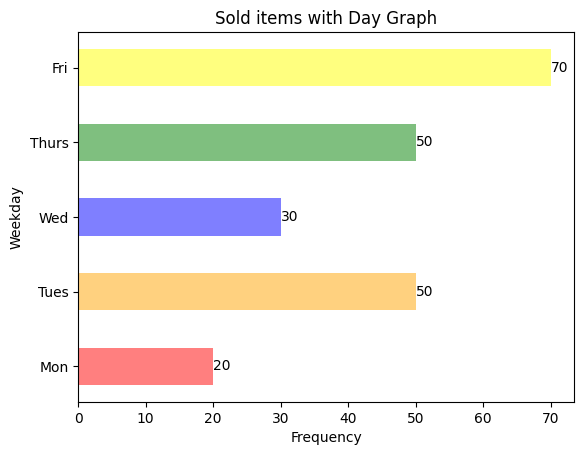

In [ ]:
# 4. Can be horizontal too:
# Just need to change the horizontal bar.

import matplotlib.pyplot as plt
import numpy as np

v = np.array([20,50,30,50,70])
subject = np.array(["Mon","Tues","Wed","Thurs","Fri"])
c = np.array(['red','orange','blue','green','yellow'])

plt.barh(subject,v,color = c, alpha = 0.5, height = 0.5)
plt.title("Sold items with Day Graph")
plt.xlabel("Frequency")
plt.ylabel("Weekday")

for i, val in enumerate(v):
    plt.annotate(
        text=str(val),
        xy= (val,i),
        ha='left',
        va='center')

# What Changed?
# 1. width = height
# 2. ha and va positions
# 3, xy positions

## Practice Questions (Matplotlib)

**Q1.** Recreate this horizontal bar graph.

<img src="https://github.com/Basil1361/March-2026-Workshop-Resources/blob/master/Resources/Pictures/MPLQ1ques.png?raw=true" width="600">


**Q2.** Plot this graph of y = x^2 for the range of 1 <= x <= 5.

<img src="https://github.com/Basil1361/March-2026-Workshop-Resources/blob/master/Resources/Pictures/MPLQ2ques.png?raw=true" width="600">

**Q3.** Plot y = sin(x) with suitable x-axis.

<img src = "https://github.com/Basil1361/March-2026-Workshop-Resources/blob/master/Resources/Pictures/MPLQ3ques.png?raw=true" width = "600">


**Q4.** Plot these two graphs of y = x^2 and y = x + 10 for the range of -10 <= x <= 10.

<img src="https://github.com/Basil1361/March-2026-Workshop-Resources/blob/master/Resources/Pictures/MPLQ4ques.png?raw=true" width="600">


# C: Machine Learning (Diving Through Regression Only)


What is Machine Learning?
<br/>
Machine learning is the subset of artificial intelligence (AI) focused on algorithms that can “learn” the patterns of training data and, subsequently, make accurate inferences about new data.

Tutorials, check comments
<!-- [Regression](https://www.youtube.com/watch?v=CtsRRUddV2s)
<br/>
[Gradient Descent](https://www.youtube.com/watch?v=qg4PchTECck)
<br/>
[Logistic Regression](https://www.youtube.com/results?search_query=logistic+regression)
<br/> -->


## Regression (Pt 1)
What is Regression?

Applications of Regression

Types of Regression

Limitations of Regression


In [ ]:
# Previously, we have produced a positive correlation between Price and the Property SQFT.
# We can use Regression to further analyze our data.

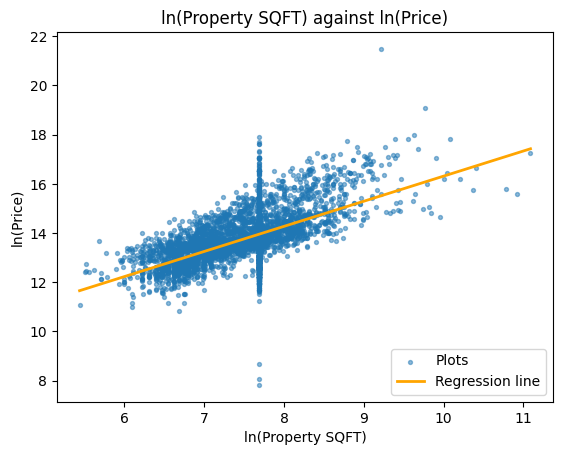

In [ ]:
# We can try:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

reg = LinearRegression()

x_values = np.array(NY_clean_data2['PROPERTYSQFT']).reshape(-1,1)
y_values = np.array(NY_clean_data2['PRICE'])

plt.scatter(np.log(x_values),np.log(y_values),s = 8,alpha = 0.5, label = "Plots")
# Note that the x_values 1D, needs to be in 2D
# 1D = [1,2,3,4,5]
# 2D = [[1],[2],[3],[4],[5]]

# reg.fit(x_values,y_values)

# prediction = reg.predict([[9.1]])
# print(prediction)


# UI

plt.title("ln(Property SQFT) against ln(Price)")
plt.ylabel("ln(Price)")
plt.xlabel("ln(Property SQFT)")

# create a smooth x range for the regression line
# fit the regression (on the same log scale as your scatter)
reg.fit(np.log(x_values), np.log(y_values))

# create a smooth x range for the regression line
x_line = np.linspace(np.log(x_values).min(), np.log(x_values).max(), 200).reshape(-1,1)

# predict y on that line
y_line = reg.predict(x_line)

# plot regression line
plt.plot(x_line.ravel(), y_line, linewidth=2, color = 'orange', label = 'Regression line')
plt.legend(loc = "lower right")

plt.show()

[1933369.3763196] [12151500.25152366]


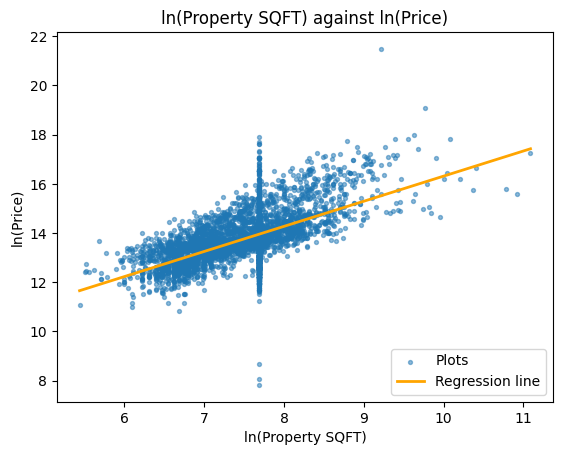

In [ ]:
# Now, we can try to label a point of interest,
# Example, I want to predict y value of x = 8.2, and y value of x = 50

# We can try:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

reg = LinearRegression()

x_values = np.array(NY_clean_data2['PROPERTYSQFT']).reshape(-1,1)
y_values = np.array(NY_clean_data2['PRICE'])

plt.scatter(np.log(x_values),np.log(y_values),s = 8,alpha = 0.5, label = "Plots")
# Note that the x_values 1D, needs to be in 2D
# 1D = [1,2,3,4,5]
# 2D = [[1],[2],[3],[4],[5]]

# reg.fit(x_values,y_values)

# prediction = reg.predict([[9.1]])
# print(prediction)


# UI

plt.title("ln(Property SQFT) against ln(Price)")
plt.ylabel("ln(Price)")
plt.xlabel("ln(Property SQFT)")

# create a smooth x range for the regression line
# fit the regression (on the same log scale as your scatter)
reg.fit(np.log(x_values), np.log(y_values))

# create a smooth x range for the regression line
x_line = np.linspace(np.log(x_values).min(), np.log(x_values).max(), 200).reshape(-1,1)

# predict y on that line
y_line = reg.predict(x_line)

# plot regression line
plt.plot(x_line.ravel(), y_line, linewidth=2, color = 'orange', label = 'Regression line')
plt.legend(loc = "lower right")

# predict values

def prediction1():
  return(reg.predict([[8.2]]))

def prediction2():
  return(reg.predict([[10]]))

print(prediction1(),prediction2())

# Since this is exponented, we can return real values using this.
# def prediction1():
#   return(np.exp(reg.predict([[8.2]])))

# def prediction2():
#   return(np.exp(reg.predict([[10]])))

plt.show()

Pred at x=8.2 (ln scale): 14.474774829598692
Pred at x=10 (ln scale): 16.312963197619773


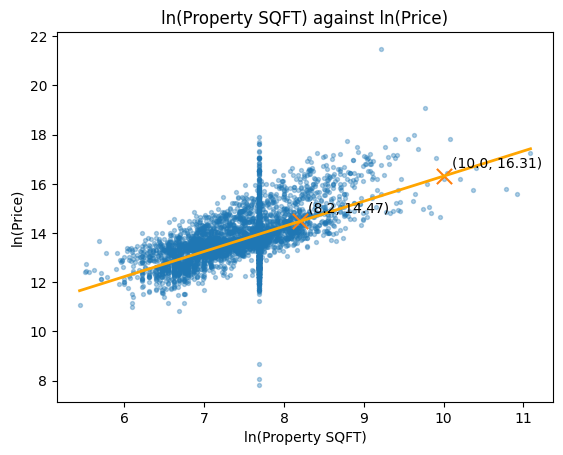

In [ ]:
# Plot these predictions on the graph.

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

reg = LinearRegression()

x_values = np.array(NY_clean_data2['PROPERTYSQFT']).reshape(-1,1)
y_values = np.array(NY_clean_data2['PRICE'])

plt.scatter(np.log(x_values), np.log(y_values), s=8, alpha=0.35, label="Plots")

plt.title("ln(Property SQFT) against ln(Price)")
plt.ylabel("ln(Price)")
plt.xlabel("ln(Property SQFT)")

# fit the regression (on the same log scale as your scatter)
reg.fit(np.log(x_values), np.log(y_values))

# regression line
x_line = np.linspace(np.log(x_values).min(), np.log(x_values).max(), 200).reshape(-1,1)
y_line = reg.predict(x_line)
plt.plot(x_line.ravel(), y_line, linewidth=2, color="orange", label="Regression line")

# --
x_pred1 = 8.2
x_pred2 = 10.0

y_pred1 = reg.predict([[x_pred1]])[0]
y_pred2 = reg.predict([[x_pred2]])[0]

# plot prediction points
plt.scatter([x_pred1, x_pred2], [y_pred1, y_pred2],
            s=120, marker="x", label="Predictions")

# annotate prediction points
plt.annotate(f"({x_pred1:.1f}, {y_pred1:.2f})",
             (x_pred1, y_pred1), xytext=(6, 6), textcoords="offset points")
plt.annotate(f"({x_pred2:.1f}, {y_pred2:.2f})",
             (x_pred2, y_pred2), xytext=(6, 6), textcoords="offset points")

print("Pred at x=8.2 (ln scale):", y_pred1)
print("Pred at x=10 (ln scale):", y_pred2)


## How it works, Detailed explanation via MAE or MSE.
[Interactive Platform:](https://mlu-explain.github.io/linear-regression/)


**Essentials you need to know:**

$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + \dots + \hat{\beta_p}x_p $

${y} = {\beta_0} + {\beta_1}x_1 + {\beta_2}x_2 + \dots + {\beta_p}x_p$

---
$MSE = \frac{1}{n}\sum_{i=1}^{n} (y{_i}-\hat{y{_i}})^{2}$

$MAE = \frac{1}{n}\sum_{i=1}^{n} |y{_i}-\hat{y{_i}}|$

---

${y_i} = Actual\ Input$

$\hat{y_i} = Predicted\ Input$


## Gradient Descent (Pt 2)
<!-- https://www.overleaf.com/learn/latex/Integrals%2C_sums_and_limits -->

[Youtube Video](https://www.youtube.com/watch?v=qg4PchTECck)

[Explain via Desmos](https://www.desmos.com/calculator)

## Practice Questions (ML)

# D: Ending



## Club Website!

[CIPTA Club Website 🌐](https://ciptaky.com)

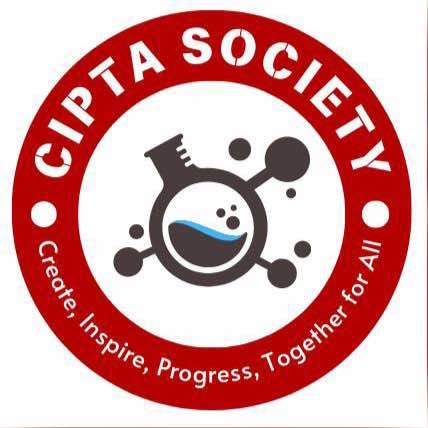

## Resources online to learn more:
![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-NEICv1aGTvDRncdvM_fXoah5SNWx4pXAvg&s)

> [Pandas documentation](https://pandas.pydata.org/docs/user_guide/dsintro.html)

> [Pandas tutorial](https://www.w3schools.com/python/pandas/pandas_intro.asp)

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGzfOQ2zxZW1B04u1HxOTKKhV4lEH-5eN1vQ&s)
> [Matplotlib documentation](https://matplotlib.org/stable/index.html)

> [Matplotlib tutorial](https://www.w3schools.com/python/matplotlib_intro.asp)


<br> </br>
![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_JZgjeGKmnjvMvkqFYMfKCvtp9XrFlx2pXg&s)
> [NumPy documentation](https://numpy.org/doc/stable/)

<br> </br>
-------------
## Free certificate / course /programs to get going


<img src="https://assets.hackclub.com/flag-orpheus-left.png" width="350">

> [Hack Club](https://hackclub.com/)  
> THIS IS THE COOLEST THING THAT A KID IN TECH COULD DO, A LOT OF COOL FREE OPPORTUNITIES AND SUCH A NICE COMMUNITY TO HAVE. Do check it out!

---

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSOd6SCkvOL-JMIAuDJ6tdobYyjvqUV8dNt0A&s)
> [Free Certification](https://www.freecodecamp.org/)
> Pretty self explanatory

---

<img src="https://opendatascience.com/wp-content/uploads/2018/12/kaggle.png" width="350">

> [Kaggle & Kaggle Learn](https://www.kaggle.com/learn)  
> Free hands-on courses & competitions for Python, Pandas, NumPy, ML, and Data Science

---
<img src="https://www.cyberstalin.com/wp-content/uploads/2024/09/Cyber-Stalin_Blog-28.jpg" width="350">

> [Google Cloud Skills Boost](https://www.cloudskillsboost.google/)  
> Free & paid courses with certificates (Cloud, Data, AI, Dev), but free should be sufficient

> [Google Cloud Platform Boleh (GCPBoleh)](https://gdg.community.dev/events/details/google-gdg-cloud-kl-presents-gcpboleh-2025-kickoff/cohost-gdg-cloud-kl/)
> Annual free Malaysian program to learn to use Google's cloud products FOR FREE with free cool swags as well !!

---
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Coursera-Logo_600x600.svg/960px-Coursera-Logo_600x600.svg.png" width="200">

> [Coursera](https://www.coursera.org)

---
<br>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlscAvljO6d6IJo8aanhISXBx1g8MxjmJF7g&s" width="350">

> [edX](https://www.edx.org)
